In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
from vqls import *
from utils import *

label = 'sin'
nq = 4
n_step = 16
func_out = {'sigmoid': sigmoid_t,'tanh': tanh_t,'elu': elu_t, 'relu': relu_t, 'sin':sin_m}
func_list = list(func_out.keys())
func_dict = {'sigmoid': .0,'tanh': 1.0,'elu':.12, 'relu':.0, 'sin':.0}

pnq = {'3':(3,8),
        '4':(4,16)}
columns=['function', 'nq', 'knot', 'training cost', 'time(s)', 'weights', 'RSS_h', 'RSS_q' ]

file_path = f"results_gvqs_{label}_{nq}.json"
file_path = 'results_vqs_sin_1_20.json'

In [41]:
df = pd.read_json(file_path)
df

,exe_time,rmse,RSS_q,weights,training_cost,seed
0,138.782726,0.723307,20.926922,"[[6.1403098538], [5.9842954129], [4.727475806]...","[0.1301338799, 0.1205596954, 0.1033350331, 0.0...",7188
1,140.592409,0.722406,20.874790,"[[6.1400186496], [6.0060610829], [4.7294355209...","[0.1298073673, 0.1201389915, 0.1022497478, 0.0...",5446
2,138.011224,0.724330,20.986133,"[[6.1335220759], [5.9803036443], [4.7194814175...","[0.1298493826, 0.1201936006, 0.102392842000000...",2419
3,141.416827,0.722493,20.879825,"[[6.1386249275], [6.0061392174], [4.7220496512...","[0.1297079823, 0.12000925280000001, 0.10190707...",1033
4,136.432169,0.719165,20.687904,"[[6.1434035182], [6.0037532706], [4.7229025813...","[0.12994273280000002, 0.1203144285, 0.10270707...",5191
5,134.572790,0.724945,21.021807,"[[6.1412681722], [6.0132292692], [4.7191312303...","[0.1298032052, 0.1201335741, 0.102235515800000...",4008
6,135.448833,0.721316,20.811897,"[[6.13726677], [5.9802938906000005], [4.721797...","[0.1299475416, 0.12032063400000001, 0.10272312...",2436
7,132.131750,0.725089,21.030185,"[[6.1095063059], [6.0080180577], [4.7234408455...","[0.1300318056, 0.1204290772, 0.103002244200000...",1445
8,139.943620,0.723590,20.943326,"[[6.1397671355], [6.002268886], [4.7213581783]...","[0.12981110040000002, 0.12014384930000001, 0.1...",2223
9,137.947443,0.725553,21.057109,"[[6.1151143055], [5.9832214278], [4.7034787224...","[0.1298717536, 0.12022261960000001, 0.10246860...",9922


In [36]:
df.training_cost[0]

[0.1301338799,
 0.1205596954,
 0.1033350331,
 0.0039218262,
 0.1697935116,
 0.2323315354,
 0.0509067922,
 0.0250987288,
 0.0064716523,
 0.038349844800000005,
 0.0002458695,
 0.0005061965,
 9.24604e-05]

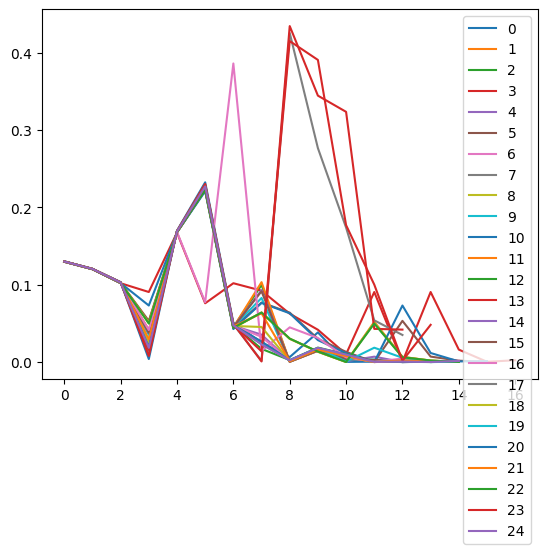

In [37]:
#Visualize training cost and obtain best performing epoch
argM = []
for i,item in enumerate(df["training_cost"].values):
    argM.append(np.argmin(item))
    plt.plot(item, label = i)
plt.legend()

In [15]:
## experimental specific settings


sigmoid 2.5604094245702336
tanh 2.3134308843812557
elu 1.5109225878099715
relu 1.0751889368850482
sin 2.5


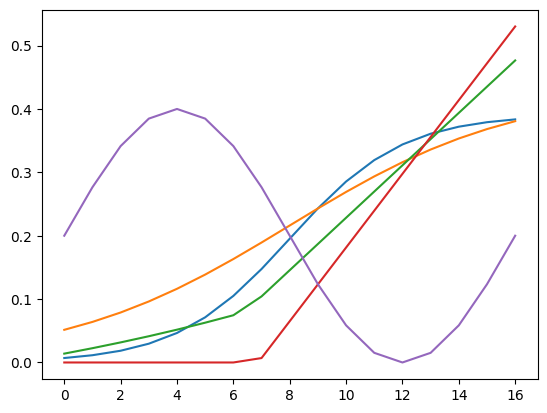

In [17]:

from utils import *
tot = []

#############################################################################################
###################################### System Preparatio and _sin_#################
#############################################################################################
for label in func_list:
    lower = 0. 
    upper = 1. 
    f_i = func_dict[label]
    scaled=True
    func = func_out[label]
    x = np.arange(lower, upper + .03, (upper-lower)/n_step).tolist() 
    xx = np.linspace(lower, upper, n_step) ##inputs sampling in the interval 0,1
    y = [func(value,f_i) for value in x]

    if scaled:
        norm = np.linalg.norm(y)
        print(label, norm)
        y = y / norm
    plt.plot(y)
    tck=splrep(x,y,k=1) #coeffs
    matrix,vector,v_norm = GeneralizedVQS_System(n_step,label,x,xx,scaled=scaled)


#############################################################################################
################################# VQLS and Linear Prob. Solving #############################
#############################################################################################


k_numb=np.linalg.cond(np.array(matrix))

vqls_circuit = VQLS(matrix,v_norm,nq,opt='COBYLA') 


beta_classic                 : [ 1.79862100e-02  4.02018812e-02 -1.08690957e-01  1.08546744e+00
 -3.92600627e+00  1.12987468e+01 -2.19716681e+01  3.37325659e+01
 -3.76220919e+01  3.39810949e+01 -2.15041058e+01  1.19391401e+01
 -3.16049806e+00  1.93615865e+00  7.97671560e-01  9.82013790e-01]
1.0000000000000002
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999999
1.0000000000000002
1.0
1.0


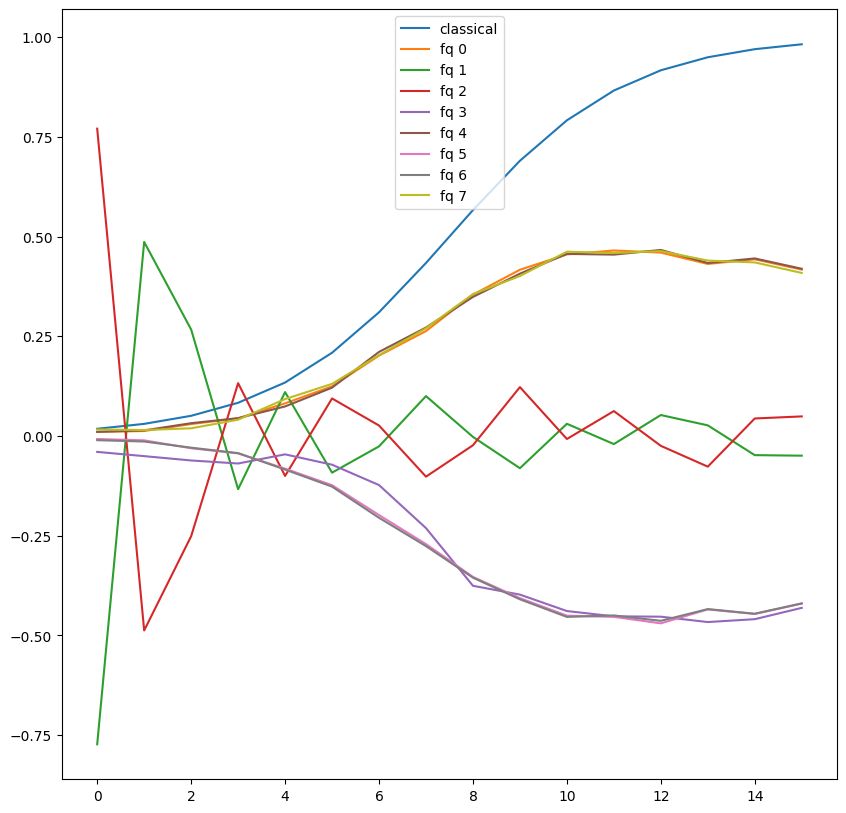

In [33]:
lower = 0. 
upper = 1. 
f_i = func_dict[label]
scaled=False
func = func_out[label]
x = np.arange(lower, upper + .03, (upper-lower)/n_step).tolist() 
xx = np.linspace(lower, upper, n_step) ##inputs sampling in the interval 0,1
y = [func(value,f_i) for value in x]
matrix,vector,v_norm = GeneralizedVQS_System(n_step,label,x,xx,scaled=scaled)
c = np.linalg.solve(matrix,vector)
print('beta_classic                 :',c)
plt.figure(figsize=(10,10))

y_c=np.dot(matrix,c) #classic
plt.plot(range(len(y_c)),y_c, label="classical")
k_numb=np.linalg.cond(np.array(matrix))

vqls_circuit = VQLS(matrix,v_norm,nq,opt='COBYLA') 

for i,item in enumerate(df['in_train_weights']):
  weights = item[argM[i]]
  q = vqls_circuit.solution(weights).real
  y_q=np.dot(matrix,q) #hybrid
                        #Quantum

  y_fq=[]
  for el in matrix:
    y_fq.append(vqls_circuit.direct_prod2(weights,el))
  print(np.linalg.norm(q))
  #plt.plot(range(len(y_fq)),y_q,label= f"h {i}")
  if i == 30:
    plt.plot(range(len(y_fq)),y_fq,label= f"fq {i}", linewidth = 10)
  else:
    plt.plot(range(len(y_fq)),y_fq,label= f"fq {i}")
plt.legend()

In [38]:
best = np.argmin(df['rmse'])
weights = df['weights'][best]


In [8]:
print()


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Quantum State (0.010102183683402504+0j)
[0.         0.93333333 0.06666667 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Quantum State (0.012394430287553588+0j)
[0.         0.         0.86666667 0.13333333 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Quantum State (0.029768304814170914+0j)
[0.  0.  0.  0.8 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
Quantum State (0.044284435196286984+0j)
[0.         0.         0.         0.         0.73333333 0.26666667
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Quantum State (0.08173038350972811+0j)
[0.         0.         0.         0.         0.         0.66666667
 0.33333333 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Quantum State

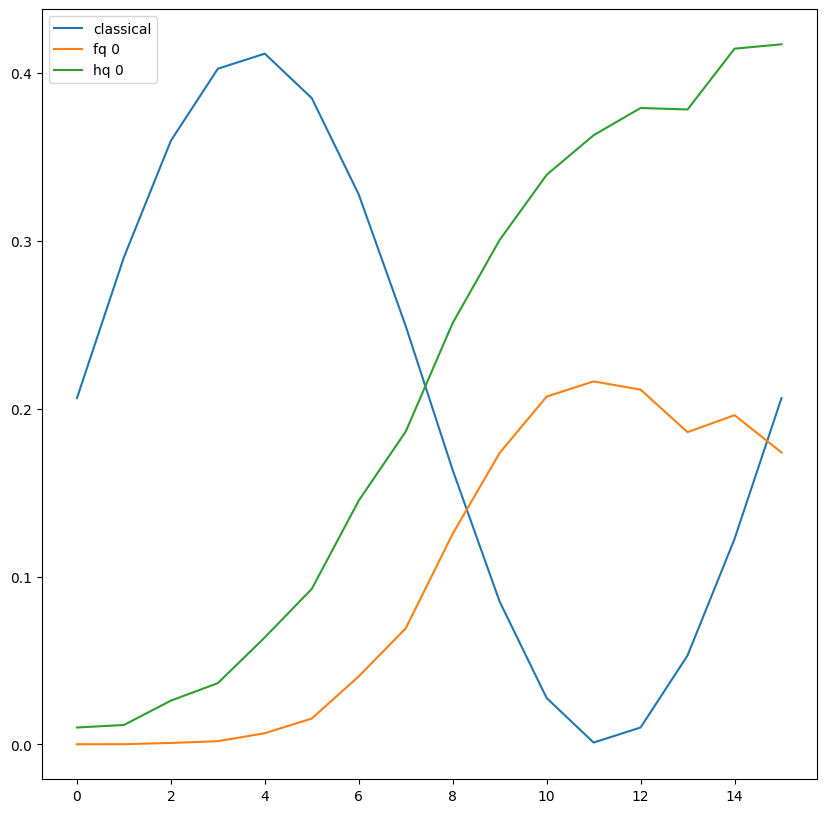

In [9]:
#Best performing model based on RSS
best = np.argmin(df['RSS_q'])


weights = df['in_train_weights'][best][argM[best]]
q = vqls_circuit.solution(weights).real
y_q=np.dot(matrix,q) #hybrid
                  #Quantum
plt.figure(figsize=(10,10))
plt.plot(range(len(y_c)),y_c, label="classical")

y_fq=[]
for el in matrix:
  print(el)
  y_fq.append(vqls_circuit.direct_prod2(weights,el, visualize=True))

#plt.plot(range(len(y_fq)),y_q,label= f"h {i}")
#plt.plot(range(len(y_fq)),np.abs(y_fq), label= f"fq abs {best}")
#plt.plot(range(len(y_fq)),np.abs(y_q), label= f"hq abs {best}")
plt.plot(range(len(y_fq)),np.power((y_fq),2), label= f"fq {best}")
plt.plot(range(len(y_fq)),(y_q), label= f"hq {best}")
plt.legend()
#plt.savefig(f'{file_path[:-5]}.png')
plt.show()

## Print approximation of best models for gvqspline


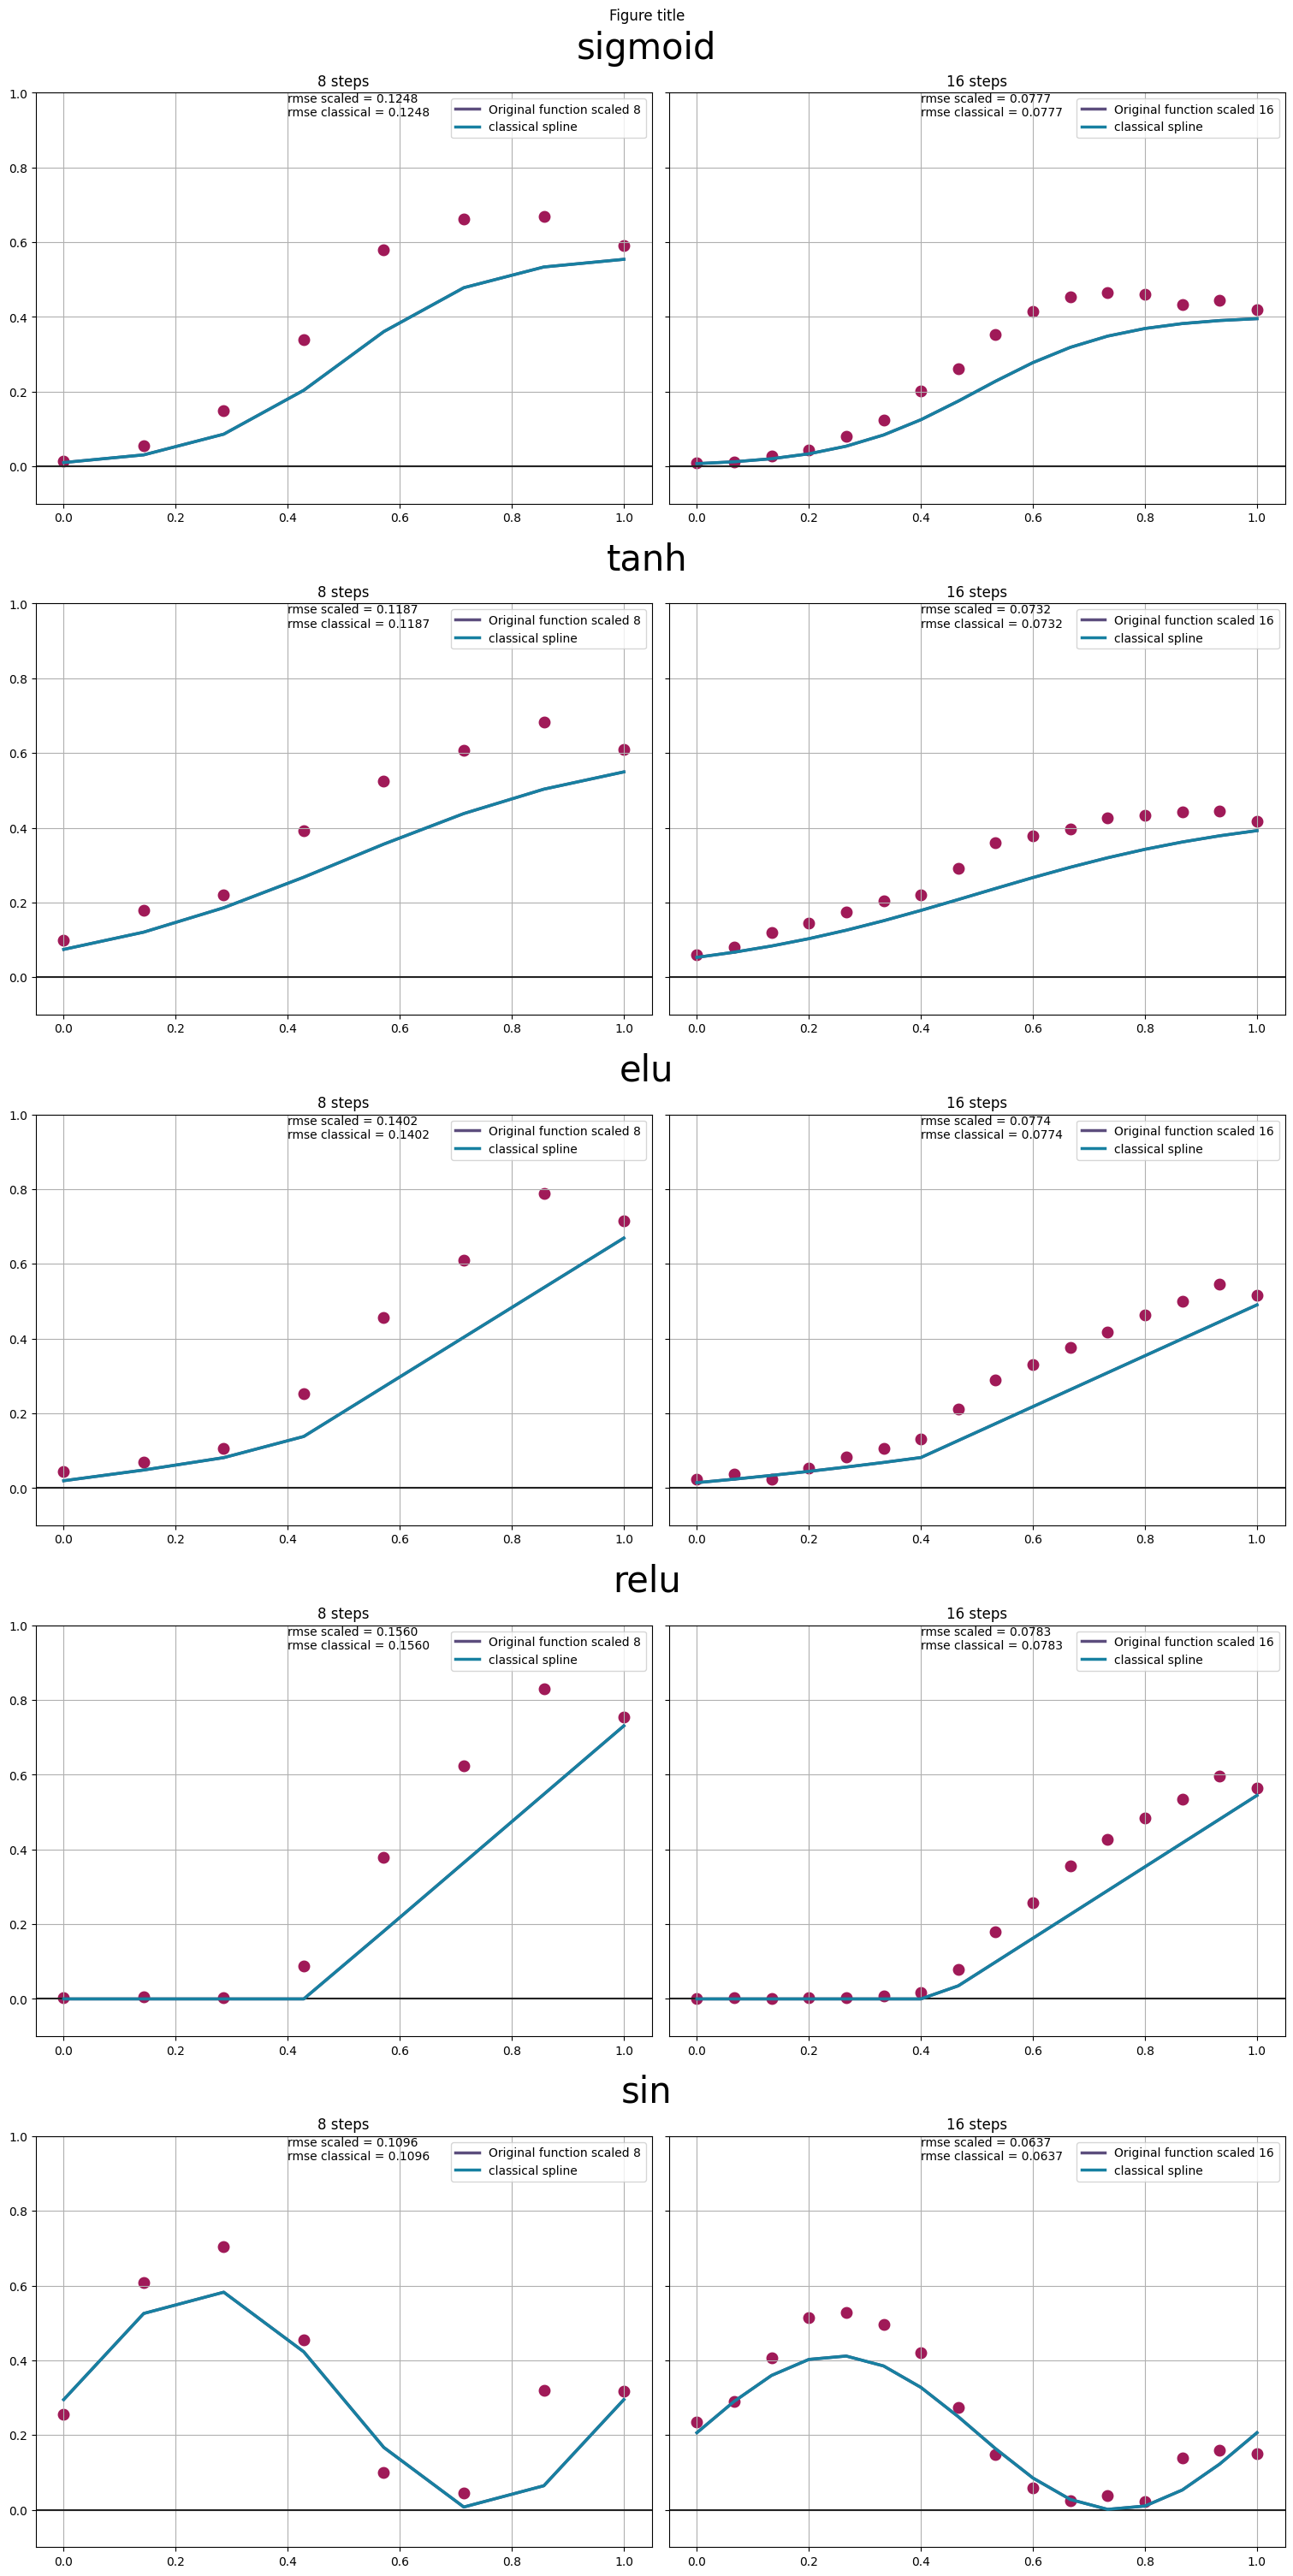

In [11]:
func_out = {'sigmoid': sigmoid_t,'tanh': tanh_t,'elu': elu_t, 'relu': relu_t, 'sin':sin_m}
func_list = list(func_out.keys())
func_dict = {'sigmoid': .0,'tanh': 1.0,'elu':.12, 'relu':.0, 'sin':.0}

pnq = {'3':(3,8),
        '4':(4,16)}
columns=['function', 'nq', 'knot', 'training cost', 'time(s)', 'weights', 'RSS_h', 'RSS_q' ]
tot = []
for flab, fun in func_out.items():
    for nq, knot in  pnq.values():
        file_path = f"results_{flab}_{nq}.json"
        df = pd.read_json(file_path)
        best = np.argmin(df['RSS_q'])
        #if knot == 16 and flab == "sin":
        #    best = 0
        if knot == 16 and "relu" == flab:
            best = 0
        weights = df['in_train_weights'][best][-1]
        tot.append([flab, nq, knot, df.training_cost[best], df.exe_time[best], weights,df.RSS_h[best], df.RSS_q[best] ])
    
df = pd.DataFrame(tot, columns=columns)
df

fig = plt.figure(constrained_layout=True, figsize=(15,30))
fig.suptitle('Figure title')
axE = fig.subfigures(5,1,  )
j = 0
rss=[]
for flab, fun in func_out.items():
    axE[j].suptitle(f'{flab}',fontsize=30)

    ax = axE[j].subplots(nrows=1, ncols=2, sharey=True,)

    ax[0].set_ylim(-0.1,1)

    j-=-1
    dl = df[df['function'] == flab]
    dl.reset_index(drop=True, inplace=True)
    #x = np.linspace(0, 1, 16).tolist() 
    #for el in x:
    #    plt.axvline(el, color = '#993333', alpha=0.2)
    #x = np.linspace(0, 1, 8).tolist() 
    #for el in x:
    #    plt.axvline(el, color = '#b300b3', alpha=0.2)
    for i, el in dl.iterrows():
        lower = 0.
        upper = 1.

        f_i = func_dict[flab]
        scaled=False    
        label = flab
        n_step = el.knot
        x = np.arange(lower, upper + .03, (upper-lower)/n_step).tolist() 
        xx = np.linspace(lower, upper, n_step) ##inputs sampling in the interval 0,1
        y = [fun(value,f_i) for value in xx]

        #tck=splrep(x,y,k=1) #coeffs
        norm = np.linalg.norm(y)
        y = y / norm
        ax[i].plot(np.linspace(lower,upper,len(y)),y, label=f"Original function scaled {n_step}", color = '#5c4d7d',linewidth=2.5)

        ax[i].axhline(0, color="#222222")
        
        matrix,vector,v_norm = GeneralizedVQS_System(n_step,label,x,xx,scaled=scaled)

        vqls_circuit = VQLS(matrix,v_norm,el['nq'],opt='COBYLA') 

        c = np.linalg.solve(matrix,vector)

        y_c=np.dot(matrix,c) #classic
        ax[i].plot(np.linspace(lower,upper,len(y_c)),vector, label="classical spline", color = '#1780a1',linewidth=2.5)

        y_fq=[]
        q = vqls_circuit.solution(el['weights']).real
        y_q=np.dot(matrix,q) #hybrid
                        #Quantum

        for a in matrix:
            y_fq.append(vqls_circuit.direct_prod2(el['weights'],a))
        rssss = math.sqrt(np.square(np.subtract(y_c,np.abs(y_fq))).mean())
        rssss2 = math.sqrt(np.square(np.subtract(y,np.abs(y_fq))).mean())
        rss.append(rssss)
        colorl = '#b7094c'
        colors = '#a01a58'
        #ax[i].plot(np.linspace(lower,upper,len(y_fq)),np.abs(y_fq),label= f"full quantum {n_step}", color=colorl)
        ax[i].scatter(np.linspace(lower,upper,len(y_fq)),np.abs(y_fq), color=colors, linewidths=4)
        #plt.scatter(np.linspace(lower,upper,len(y_fq)),(y_q), label= f"hq {n_step}", color='blue')
        #plt.plot(np.linspace(lower,upper,len(y_fq)),(y_q), label= f"hq {n_step}", color='blue')
        ax[i].text(0.4,0.9, f"rmse scaled = {rssss2:.4f}\n" \
            f"rmse classical = {rssss:.4f}\n")
        ax[i].set_title(f'{n_step} steps')
        ax[i].legend()
        ax[i].grid()
#plt.savefig(f'full_plots.png')
plt.show()



#  Print VQSpline

21


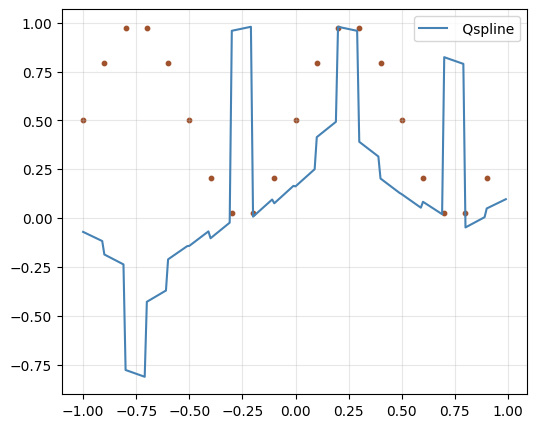

In [43]:
X = []
n_step = 20
step = (1-(-1))/n_step

x = np.arange(-1, 1 + .03, step).tolist()
from utils import *
func = sin_m
f_i =0
print(len(x))
y = [func(value,f_i) for value in x]

for i in range(1, len(x)):
    X.append(np.arange(x[i - 1], x[i], step - 0.01).tolist())
    

#################################
######### Inner Product #########
#################################

qc_full = []
classic_prod = []
vqls_circuit = qProduct(1)
for i in range(len(X)):
    for x in X[i]:
        point = [1,x]
        #quantum_prod with/without norm
        norm = 1
        qc_full.append(vqls_circuit.direct_prod2(weights[i],point,visualize=False)*norm)  

x = [item for sublist in X for item in sublist]
y = [func(value,f_i) for value in x]


##### TODO: ???????????????????????????????????????????????????????????????????
'''
if label == 'tanh':
    qc_full = [q - 0.2 for q in qc_full] 
if label == 'elu':
    classic_prod = [c -f_i for c in classic_prod]
    qc_full = [c-f_i for c in qc_full]
'''

x1=[i for j,i in enumerate(x) if j%2==0]
y1=[i for j,i in enumerate(y) if j%2==0]


fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(x, qc_full, color='steelblue',label=' Qspline') 
ax.scatter(x1,y1,color='sienna',s=10)
ax.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()
plt.close()